# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [0]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

## Get Required Files from Drive

In [146]:
### Executing in local machine 
import os
os.getcwd() 

'C:\\Users\\yf9852\\OneDrive - Sandvik\\HomeShare\\Documents\\Manish\\great_lake\\10_day\\sequential_NLP'

In [147]:
project_path =  os.getcwd()
project_path

'C:\\Users\\yf9852\\OneDrive - Sandvik\\HomeShare\\Documents\\Manish\\great_lake\\10_day\\sequential_NLP'

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [148]:
import json
import pandas as pd
import numpy as np
import tensorflow as tf

In [149]:
print(tf.__version__)

2.0.0


In [150]:
data=pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)

In [151]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [152]:
data.shape

(26709, 3)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
article_link    26709 non-null object
headline        26709 non-null object
is_sarcastic    26709 non-null int64
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


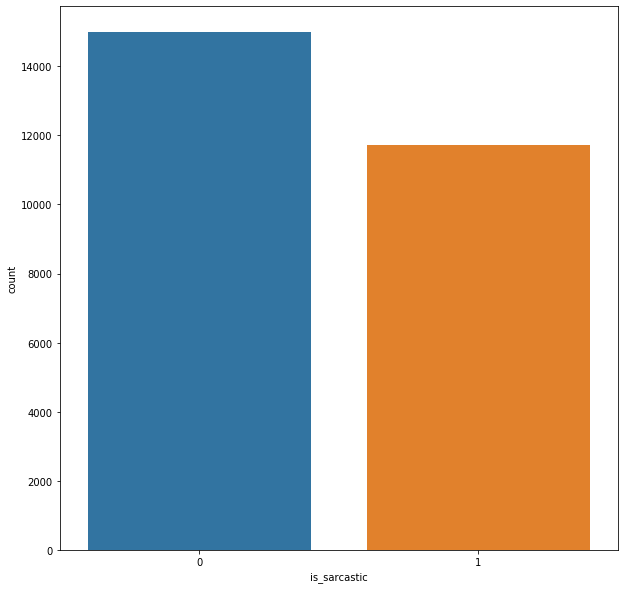

In [154]:
plt.figure(figsize = (10,10))
import seaborn as sns
sns.countplot(data.is_sarcastic)

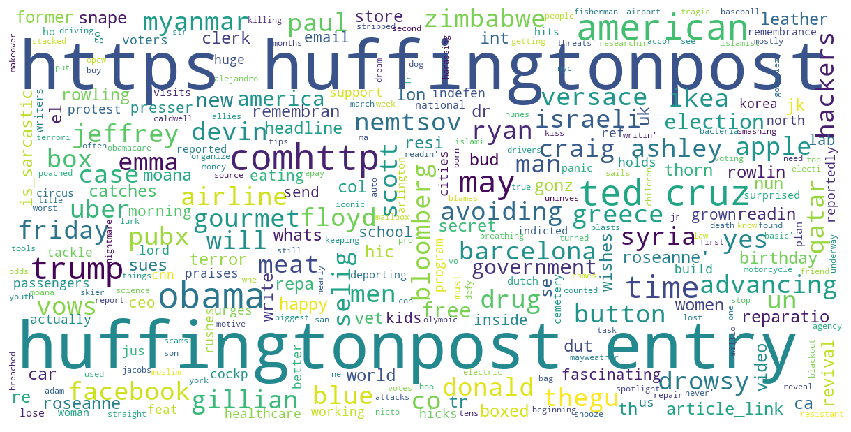

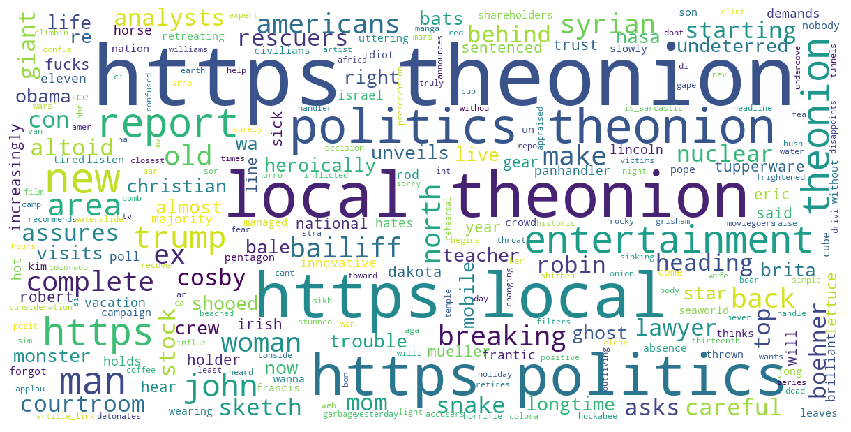

In [155]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=4000,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data[data.is_sarcastic == 0])
show_wordcloud(data[data.is_sarcastic == 1])


## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [156]:
data = data.drop("article_link", axis = 1)
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [157]:
length = data['headline'].apply(lambda x : len(x))
maxlength=max(length)

In [158]:
print("Maximum length of words s",(maxlength))

Maximum length of words s 254


#**## Modelling**

## Import required modules required for modelling.

In [159]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [160]:
max_features = 10000
maxlen = 50
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [161]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data['headline'])

# Define X and y for your model.

In [162]:
X = tokenizer.texts_to_sequences(data['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0  307  678
 3336 2297   47  381 2575    5 2576 8433]
Number of Labels:  26709
0


In [163]:
X.shape

(26709, 50)

In [164]:
y.shape

(26709,)

In [165]:
X=X.reshape(len(X),maxlen)
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.2,random_state=42 )

In [166]:
train_y=np.array(train_y)
valid_y=np.array(valid_y)

In [167]:
train_x.shape

(21367, 50)

In [168]:
valid_x.shape

(5342, 50)

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [169]:
vocab_size = len(token.word_index) + 1 #as index starts for 0, 1 is added
print(vocab_size)

30885


#**## Word Embedding**

## Get Glove Word Embeddings

In [170]:
glove_file =  "glove.6B.zip"

In [171]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [172]:
EMBEDDING_FILE = './glove.6B.200d.txt'
#file = open(filename, encoding="utf8")

embeddings = {}
for o in open(EMBEDDING_FILE,encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [173]:
embedding_matrix = np.zeros((vocab_size, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [174]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))


model = Sequential()
model.add(Embedding(vocab_size, output_dim=embedding_size, weights=[embedding_matrix], ))
model.add(Bidirectional(LSTM(units=256 , return_sequences=True, dropout = 0.5)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.05), loss='binary_crossentropy', metrics=['acc'])

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [175]:
batch_size = 100
epochs = 10

## Add your code here ##

checkpoint_filepath = project_path+'//model.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_acc',mode='max',save_best_only=True)
## Add your code here ##
history = model.fit(train_x, train_y, validation_data=(valid_x,valid_y), batch_size = batch_size , epochs = epochs, callbacks=[model_checkpoint_callback])


Train on 21367 samples, validate on 5342 samples
Epoch 1/10
21367/21367 [==============================] - 469s 22ms/sample - loss: 0.7611 - acc: 0.5809 - val_loss: 0.5477 - val_acc: 0.7153
Epoch 2/10
21367/21367 [==============================] - 447s 21ms/sample - loss: 0.4702 - acc: 0.7818 - val_loss: 0.4873 - val_acc: 0.7800
Epoch 3/10
21367/21367 [==============================] - 500s 23ms/sample - loss: 0.3656 - acc: 0.8434 - val_loss: 0.4179 - val_acc: 0.8254
Epoch 4/10
21367/21367 [==============================] - 526s 25ms/sample - loss: 0.2980 - acc: 0.8785 - val_loss: 0.4264 - val_acc: 0.8319
Epoch 5/10
21367/21367 [==============================] - 475s 22ms/sample - loss: 0.2656 - acc: 0.8920 - val_loss: 0.4035 - val_acc: 0.8372
Epoch 6/10
21367/21367 [==============================] - 474s 22ms/sample - loss: 0.2471 - acc: 0.9006 - val_loss: 0.4302 - val_acc: 0.8424
Epoch 7/10
21367/21367 [==============================] - 474s 22ms/sample - loss: 0.2330 - acc: 0.9072 -

In [176]:
print("Accuracy on Testing Data is - " , model.evaluate(valid_x,valid_y)[1]*100)

5342/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy on Testing Data is -  83.87905955314636
